# 
## <p style="background-color:white;font-family:newtimeroman;color:coral;font-size:100%;text-align:center;border-radius:20px 60px;">MARKOWITZ's MODERN PORTFOLIO THEORY FOR S and P 500 TECHNOLOGY STOCKS INVESTMENT OPTIMIZATION</p>
![](https://3.bp.blogspot.com/-L3bXJ18DfgY/WLWMIFWnd5I/AAAAAAAABRQ/nWxTcueDJt8H8fiZesjUCctJ8UJE6nKmgCLcB/s640/Untitled.png)

By Adedayo Adeboye Abiodun


In the fast-paced world of technology stocks within the S&P 500, the key to successful investment lies in informed decision-making. This project embarks on a journey through the realms of Modern Portfolio Theory (MPT) to construct a well-diversified portfolio. By leveraging historical data scraped from Yahoo Finance and the S&P 500 constituents from Wikipedia, this endeavor aims to unlock valuable insights into risk, return, and the optimal allocation of assets. Join us as we navigate the dynamic landscape of technology investments, guided by the principles of MPT.

In this Python project, we embark on a journey to harness the power of MPT to construct an optimal portfolio consisting of S&P 500 technology stocks. Our goal is twofold: to identify the most promising technology stocks within the S&P 500 and to allocate investments intelligently to minimize risk while maximizing returns. Through the fusion of data analysis, statistical modeling, and advanced Python programming, we will craft a portfolio that not only adapts to market dynamics but also aligns with our unique investment objectives.

This project is designed for both novice and seasoned investors, offering a practical hands-on experience in applying quantitative methods to the world of finance. By the end of our journey, you will have the tools and insights to construct your own tech-savvy portfolio, making informed decisions in a dynamic market.

Join us on this exciting exploration of Modern Portfolio Theory and its application to the dynamic world of S&P 500 technology stocks. Let's embark on this data-driven adventure to optimize your investment strategy and potentially secure a prosperous financial future.

Here are the list of Python Liberaries:
    
     1. datetime
     2. pandas
     3. yfinance
     4. numpy
     5. matplotlib.pyplo
     6. seaborn
     7. plotly_express
     8. scipy.stats.mstats

In [5]:
import datetime as dt
from datetime import date
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats.mstats import gmean
import warnings
warnings.filterwarnings("ignore")
from scipy import optimize

In [6]:
#  pip uninstall -y yfinance

In [7]:
# pip install yfinance==0.1.83

### Web Scraping
Gathering data about the technology companies listed on the S&P 500 index from Wikipedia

In [8]:
sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [9]:
sp500_table = pd.read_html(sp500_url)

In [10]:
# Check the tables lengths

len(sp500_table)

2

In [11]:
# Select the relevant data table index [0

sp500_table = sp500_table[0]

In [12]:
sp500_table

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                       Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [13]:
# Select only information technology dataframe

sp500_table_tech = sp500_table[sp500_table['GICS Sector'] == 'Information Technology']

In [14]:
sp500_table_tech.head(4)

Symbol    Security             GICS Sector  \
4     ACN   Accenture  Information Technology   
7    ADBE  Adobe Inc.  Information Technology   
14   AKAM      Akamai  Information Technology   
27    AMD         AMD  Information Technology   

                     GICS Sub-Industry     Headquarters Location  Date added  \
4       IT Consulting & Other Services           Dublin, Ireland  2011-07-06   
7                 Application Software      San Jose, California  1997-05-05   
14  Internet Services & Infrastructure  Cambridge, Massachusetts  2007-07-12   
27                      Semiconductors   Santa Clara, California  2017-03-20   

        CIK Founded  
4   1467373    1989  
7    796343    1982  
14  1086222    1998  
27     2488    1969

In [15]:
# Generate tickers for IT companies

tickers_IT = sp500_table_tech['Symbol'].tolist()

In [16]:
# Scrap Historical data from yahoo finanace
today = date.today()

sp500_table_tech_priceIT = yf.download(tickers_IT ,start = '2023-01-10', end = today)['Adj Close']

[*********************100%***********************]  64 of 64 completed


In [17]:
sp500_table_tech_priceIT

AAPL         ACN        ADBE         ADI        ADSK  \
Date                                                                     
2023-01-10  130.174622  271.752716  338.700012  166.840118  193.429993   
2023-01-11  132.922897  278.968079  342.929993  167.402100  199.929993   
2023-01-12  132.843231  281.707336  344.540009  166.297836  199.960007   
2023-01-13  134.187485  280.020142  344.380005  166.603500  200.589996   
2023-01-17  135.362488  282.739532  344.380005  164.562607  200.699997   
...                ...         ...         ...         ...         ...   
2023-10-04  173.660004  309.390015  518.419983  173.789993  207.059998   
2023-10-05  174.910004  309.660004  516.440002  172.100006  203.960007   
2023-10-06  177.490005  312.190002  526.679993  173.970001  210.039993   
2023-10-09  178.990005  312.010010  529.289978  173.320007  210.559998   
2023-10-10  178.389999  312.320007  532.719971  175.970001  212.470001   

                  AKAM        AMAT         AMD        ANET        ANSS  ...  \
Date                                                                    ...   
2023-01-10   87.389999  107.277817   68.050003  115.230003  248.399994  ...   
2023-01-11   88.730003  109.283554   69.059998  116.330002  252.160004  ...   
2023-01-12   88.639999  109.422569   70.800003  117.180000  251.970001  ...   
2023-01-13   88.699997  109.194199   71.000000  115.000000  254.100006  ...   
2023-01-17   88.879997  108.638145   71.589996  116.300003  252.679993  ...   
...                ...         ...         ...         ...         ...  ...   
2023-10-04  106.540001  139.300003  104.070000  186.029999  290.820007  ...   
2023-10-05  105.660004  139.279999  102.910004  188.029999  290.179993  ...   
2023-10-06  105.760002  140.289993  107.239998  194.020004  296.510010  ...   
2023-10-09  105.730003  140.149994  106.970001  196.399994  300.910004  ...   
2023-10-10  108.190002  141.399994  109.010002  194.729996  303.279999  ...   

                  SWKS         TDY         TEL         TER       TRMB  \
Date                                                                    
2023-01-10   95.747658  409.250000  121.038750   94.480499  52.500000   
2023-01-11   98.634514  410.980011  122.074532   96.035568  53.259998   
2023-01-12   99.420059  416.130005  122.449394   95.836197  54.139999   
2023-01-13   99.773552  416.130005  122.557892   97.132095  54.509998   
2023-01-17  100.716209  415.970001  122.528305   96.334625  55.430000   
...                ...         ...         ...         ...        ...   
2023-10-04   97.570000  401.279999  123.410004  100.269997  52.299999   
2023-10-05   96.760002  398.100006  120.930000   99.540001  51.400002   
2023-10-06   98.320000  401.420013  123.970001  100.669998  51.340000   
2023-10-09   98.220001  410.500000  123.099998   99.050003  51.820000   
2023-10-10   98.300003  411.019989  124.330002   99.589996  52.070000   

                   TXN         TYL        VRSN        WDC        ZBRA  
Date                                                                   
2023-01-10  174.557785  313.070007  208.000000  38.169998  286.929993  
2023-01-11  175.017670  318.089996  211.669998  38.419998  299.790009  
2023-01-12  174.293594  316.559998  212.940002  37.959999  293.000000  
2023-01-13  175.154648  316.760010  213.910004  37.220001  293.700012  
2023-01-17  171.622391  319.119995  214.479996  37.320000  293.579987  
...                ...         ...         ...        ...         ...  
2023-10-04  157.970001  384.579987  204.500000  45.290001  230.940002  
2023-10-05  155.110001  381.799988  205.080002  46.110001  222.539993  
2023-10-06  157.000000  388.239990  207.210007  46.400002  223.850006  
2023-10-09  156.720001  392.950012  207.770004  45.400002  222.580002  
2023-10-10  157.660004  392.000000  208.289993  45.349998  222.399994  

[189 rows x 64 columns]

### DESCRITIVE ANALYSIS

In [18]:
sp500_table_tech.describe()

CIK
count  6.400000e+01
mean   8.803063e+05
std    4.962233e+05
min    2.488000e+03
25%    7.427195e+05
50%    8.830380e+05
75%    1.275984e+06
max    1.730168e+06

In [19]:
sp500_table_tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 4 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 64 non-null     object
 1   Security               64 non-null     object
 2   GICS Sector            64 non-null     object
 3   GICS Sub-Industry      64 non-null     object
 4   Headquarters Location  64 non-null     object
 5   Date added             63 non-null     object
 6   CIK                    64 non-null     int64 
 7   Founded                64 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.5+ KB


In [20]:
sp500_table_tech.notnull().sum()

Symbol                   64
Security                 64
GICS Sector              64
GICS Sub-Industry        64
Headquarters Location    64
Date added               63
CIK                      64
Founded                  64
dtype: int64

### Expolatory Data Analysid

In [21]:
# Generate tickers for IT companies

tickers_ID = sp500_table_tech['GICS Sub-Industry'].unique()

In [22]:
tickers_ID = tickers_ID.tolist()

In [23]:
tickers_ID

['IT Consulting & Other Services',
 'Application Software',
 'Internet Services & Infrastructure',
 'Semiconductors',
 'Electronic Components',
 'Technology Hardware, Storage & Peripherals',
 'Semiconductor Materials & Equipment',
 'Communications Equipment',
 'Technology Distributors',
 'Systems Software',
 'Electronic Equipment & Instruments',
 'Electronic Manufacturing Services']

In [24]:
len(tickers_ID)

12

<Axes: >

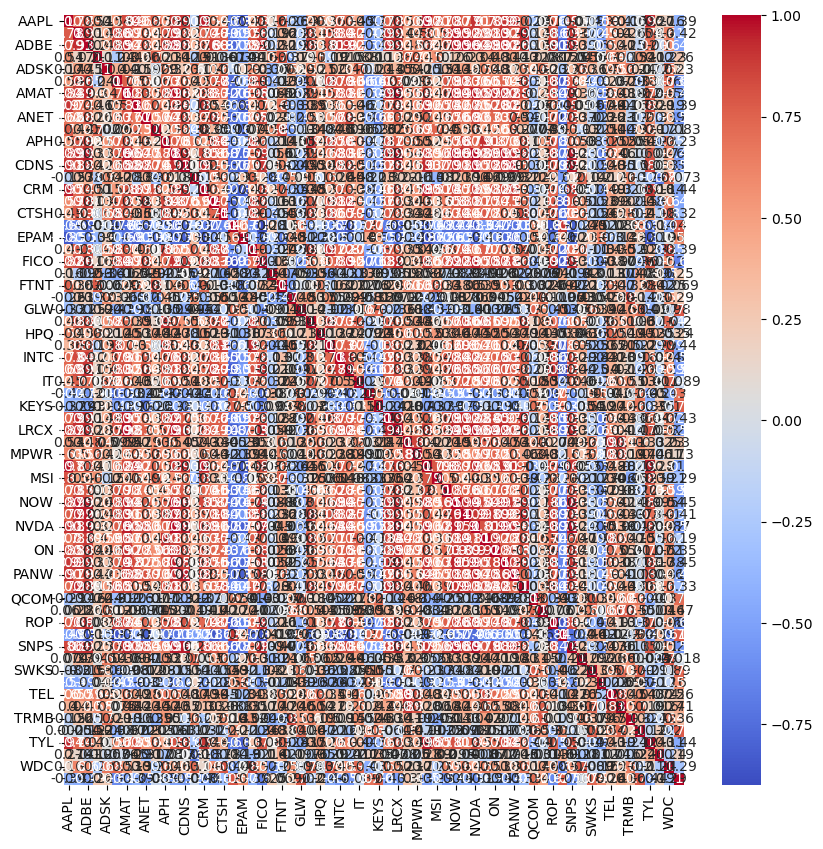

In [25]:
# Chech the symbols correclation

plt.figure(figsize = (10,10))
sns.heatmap(sp500_table_tech_priceIT.corr(),annot=True, cmap="coolwarm")

<function matplotlib.pyplot.show(close=None, block=None)>

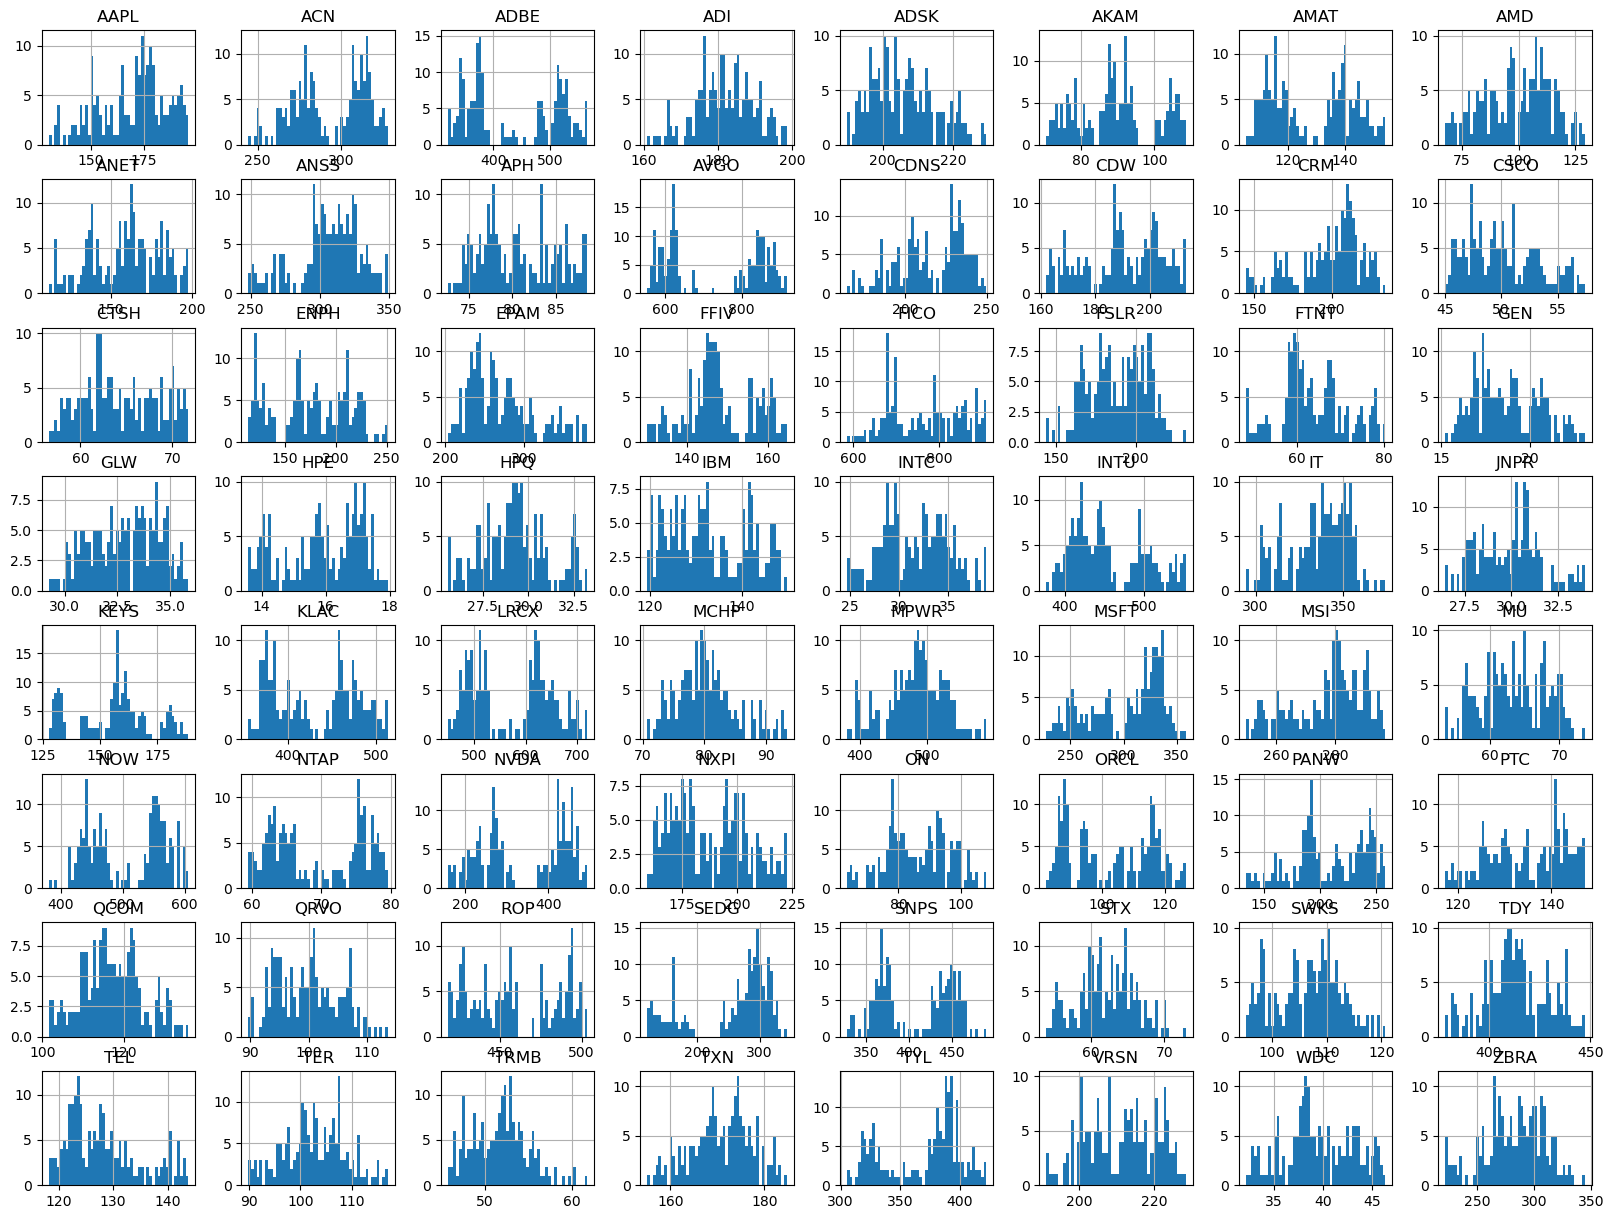

In [26]:
# Check the data distribution

sp500_table_tech_priceIT.hist(bins = 50 ,figsize = (20,15))
plt.show

In [27]:
# Apply the stack function to transpose the dataframe

sp500_table_tech_priceITranspos = pd.DataFrame(sp500_table_tech_priceIT.stack())

In [28]:
# Reset the index using reset_index function

sp500_table_tech_priceITranspos = sp500_table_tech_priceITranspos.reset_index()
sp500_table_tech_priceITranspos

Date level_1           0
0     2023-01-10    AAPL  130.174622
1     2023-01-10     ACN  271.752716
2     2023-01-10    ADBE  338.700012
3     2023-01-10     ADI  166.840118
4     2023-01-10    ADSK  193.429993
...          ...     ...         ...
12091 2023-10-10     TXN  157.660004
12092 2023-10-10     TYL  392.000000
12093 2023-10-10    VRSN  208.289993
12094 2023-10-10     WDC   45.349998
12095 2023-10-10    ZBRA  222.399994

[12096 rows x 3 columns]

In [29]:
# Rename the columns

sp500_table_tech_priceITranspos.rename({'level_1': 'Symbol', 0: 'Close'},
          axis = "columns", inplace = True)

In [30]:
sp500_table_tech_priceITranspos

Date Symbol       Close
0     2023-01-10   AAPL  130.174622
1     2023-01-10    ACN  271.752716
2     2023-01-10   ADBE  338.700012
3     2023-01-10    ADI  166.840118
4     2023-01-10   ADSK  193.429993
...          ...    ...         ...
12091 2023-10-10    TXN  157.660004
12092 2023-10-10    TYL  392.000000
12093 2023-10-10   VRSN  208.289993
12094 2023-10-10    WDC   45.349998
12095 2023-10-10   ZBRA  222.399994

[12096 rows x 3 columns]

#### Merge sp500_table_tech_priceITranspos with sp500_table_tech on Symbol

In [31]:
# merge

sp500_table_tech_priceITranspos  = sp500_table_tech_priceITranspos.merge(sp500_table_tech[['Symbol','GICS Sub-Industry']], on = 'Symbol')
# sp500_table_tech_priceITranspos['Date'] = pd.to_datetime(sp500_table_tech_priceITranspos['Date'])
sp500_table_tech_priceITranspos.head()

Date Symbol       Close                           GICS Sub-Industry
0 2023-01-10   AAPL  130.174622  Technology Hardware, Storage & Peripherals
1 2023-01-11   AAPL  132.922897  Technology Hardware, Storage & Peripherals
2 2023-01-12   AAPL  132.843231  Technology Hardware, Storage & Peripherals
3 2023-01-13   AAPL  134.187485  Technology Hardware, Storage & Peripherals
4 2023-01-17   AAPL  135.362488  Technology Hardware, Storage & Peripherals

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

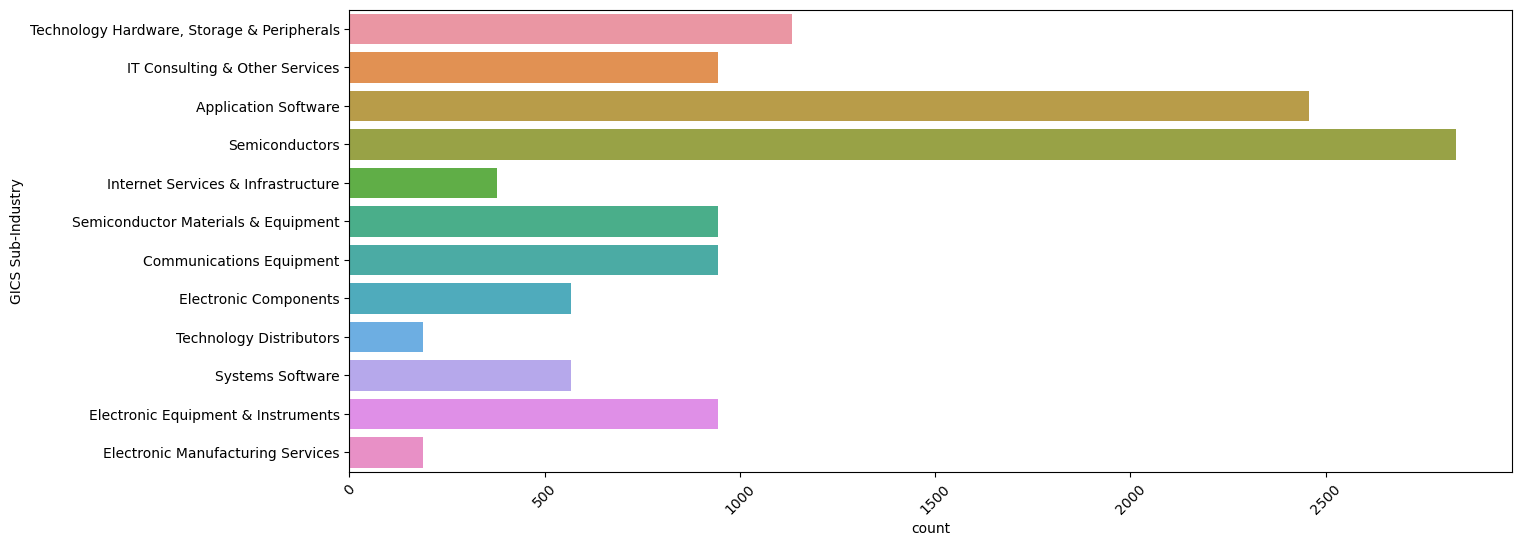

In [32]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(y='GICS Sub-Industry', data=sp500_table_tech_priceITranspos)
plt.xticks(rotation=45)

In [33]:
# convert sp500_table_tech_priceITranspos to pivot_table

IndustryIT_pivot = pd.pivot_table(sp500_table_tech_priceITranspos, values = 'Close', index = ['Date'],columns = ['GICS Sub-Industry']).reset_index()
IndustryIT_pivot

GICS Sub-Industry       Date  Application Software  Communications Equipment  \
0                 2023-01-10            236.469211                119.573346   
1                 2023-01-11            240.495479                121.050307   
2                 2023-01-12            241.639482                121.108569   
3                 2023-01-13            242.741555                120.813509   
4                 2023-01-17            244.150481                120.519470   
..                       ...                   ...                       ...   
184               2023-10-04            321.293843                139.322004   
185               2023-10-05            320.744616                139.276002   
186               2023-10-06            328.246154                141.308006   
187               2023-10-09            331.757692                143.885997   
188               2023-10-10            334.076151                143.601996   

GICS Sub-Industry  Electronic Components  Electronic Equipment & Instruments  \
0                             114.483013                          273.640860   
1                             118.121314                          278.719273   
2                             119.202981                          278.088049   
3                             120.244979                          278.790266   
4                             122.055167                          278.609459   
..                                   ...                                 ...   
184                            76.863332                          260.471395   
185                            76.110001                          258.099998   
186                            77.370002                          260.500001   
187                            77.433334                          263.124001   
188                            79.486666                          262.997997   

GICS Sub-Industry  Electronic Manufacturing Services  \
0                                         121.038750   
1                                         122.074532   
2                                         122.449394   
3                                         122.557892   
4                                         122.528305   
..                                               ...   
184                                       123.410004   
185                                       120.930000   
186                                       123.970001   
187                                       123.099998   
188                                       124.330002   

GICS Sub-Industry  IT Consulting & Other Services  \
0                                      226.109052   
1                                      230.792010   
2                                      232.622319   
3                                      233.121123   
4                                      235.260992   
..                                            ...   
184                                    221.382002   
185                                    221.806003   
186                                    223.962000   
187                                    224.736000   
188                                    224.746002   

GICS Sub-Industry  Internet Services & Infrastructure  \
0                                          147.695000   
1                                          150.200001   
2                                          150.790001   
3                                          151.305000   
4                                          151.679996   
..                                                ...   
184                                        155.520000   
185                                        155.370003   
186                                        156.485004   
187                                        156.750004   
188                                        158.239998   

GICS Sub-Industry  Semiconductor Materials & Equipment  Semiconductors  \
0        

In [34]:
IndustryIT_pivot.columns.name = None
IndustryIT_pivot

Date  Application Software  Communications Equipment  \
0   2023-01-10            236.469211                119.573346   
1   2023-01-11            240.495479                121.050307   
2   2023-01-12            241.639482                121.108569   
3   2023-01-13            242.741555                120.813509   
4   2023-01-17            244.150481                120.519470   
..         ...                   ...                       ...   
184 2023-10-04            321.293843                139.322004   
185 2023-10-05            320.744616                139.276002   
186 2023-10-06            328.246154                141.308006   
187 2023-10-09            331.757692                143.885997   
188 2023-10-10            334.076151                143.601996   

     Electronic Components  Electronic Equipment & Instruments  \
0               114.483013                          273.640860   
1               118.121314                          278.719273   
2               119.202981                          278.088049   
3               120.244979                          278.790266   
4               122.055167                          278.609459   
..                     ...                                 ...   
184              76.863332                          260.471395   
185              76.110001                          258.099998   
186              77.370002                          260.500001   
187              77.433334                          263.124001   
188              79.486666                          262.997997   

     Electronic Manufacturing Services  IT Consulting & Other Services  \
0                           121.038750                      226.109052   
1                           122.074532                      230.792010   
2                           122.449394                      232.622319   
3                           122.557892                      233.121123   
4                           122.528305                      235.260992   
..                                 ...                             ...   
184                         123.410004                      221.382002   
185                         120.930000                      221.806003   
186                         123.970001                      223.962000   
187                         123.099998                      224.736000   
188                         124.330002                      224.746002   

     Internet Services & Infrastructure  Semiconductor Materials & Equipment  \
0                            147.695000                           270.794461   
1                            150.200001                           276.538641   
2                            150.790001                           279.109987   
3                            151.305000                           281.346912   
4                            151.679996                           280.764799   
..                                  ...                                  ...   
184                          155.520000                           291.661998   
185                          155.370003                           289.270001   
186                          156.485004                           292.217993   
187                          156.750004                           290.575998   
188                          158.239998                           294.900002   

     Semiconductors  Systems Software  Technology Distributors  \
0        158.953551        218.853012               184.663284   
1        160.822242        225.584049               188.824570   
2        162.369890        232.851194               191.608704   
3        162.587833        233.789572               193.055252   
4        162.853976        235.687035               195.799728   
..              ...               ...                      ...   
184      205.362438        308.620001               205.419998   
185      204.283001        308.183323         

In [35]:
IndustryIT_pivot = IndustryIT_pivot.reset_index(drop = True)
IndustryIT_pivot

Date  Application Software  Communications Equipment  \
0   2023-01-10            236.469211                119.573346   
1   2023-01-11            240.495479                121.050307   
2   2023-01-12            241.639482                121.108569   
3   2023-01-13            242.741555                120.813509   
4   2023-01-17            244.150481                120.519470   
..         ...                   ...                       ...   
184 2023-10-04            321.293843                139.322004   
185 2023-10-05            320.744616                139.276002   
186 2023-10-06            328.246154                141.308006   
187 2023-10-09            331.757692                143.885997   
188 2023-10-10            334.076151                143.601996   

     Electronic Components  Electronic Equipment & Instruments  \
0               114.483013                          273.640860   
1               118.121314                          278.719273   
2               119.202981                          278.088049   
3               120.244979                          278.790266   
4               122.055167                          278.609459   
..                     ...                                 ...   
184              76.863332                          260.471395   
185              76.110001                          258.099998   
186              77.370002                          260.500001   
187              77.433334                          263.124001   
188              79.486666                          262.997997   

     Electronic Manufacturing Services  IT Consulting & Other Services  \
0                           121.038750                      226.109052   
1                           122.074532                      230.792010   
2                           122.449394                      232.622319   
3                           122.557892                      233.121123   
4                           122.528305                      235.260992   
..                                 ...                             ...   
184                         123.410004                      221.382002   
185                         120.930000                      221.806003   
186                         123.970001                      223.962000   
187                         123.099998                      224.736000   
188                         124.330002                      224.746002   

     Internet Services & Infrastructure  Semiconductor Materials & Equipment  \
0                            147.695000                           270.794461   
1                            150.200001                           276.538641   
2                            150.790001                           279.109987   
3                            151.305000                           281.346912   
4                            151.679996                           280.764799   
..                                  ...                                  ...   
184                          155.520000                           291.661998   
185                          155.370003                           289.270001   
186                          156.485004                           292.217993   
187                          156.750004                           290.575998   
188                          158.239998                           294.900002   

     Semiconductors  Systems Software  Technology Distributors  \
0        158.953551        218.853012               184.663284   
1        160.822242        225.584049               188.824570   
2        162.369890        232.851194               191.608704   
3        162.587833        233.789572               193.055252   
4        162.853976        235.687035               195.799728   
..              ...               ...                      ...   
184      205.362438        308.620001               205.419998   
185      204.283001        308.183323         

In [36]:
IndustryIT_pivot = IndustryIT_pivot.set_index('Date')
IndustryIT_pivot

Application Software  Communications Equipment  \
Date                                                         
2023-01-10            236.469211                119.573346   
2023-01-11            240.495479                121.050307   
2023-01-12            241.639482                121.108569   
2023-01-13            242.741555                120.813509   
2023-01-17            244.150481                120.519470   
...                          ...                       ...   
2023-10-04            321.293843                139.322004   
2023-10-05            320.744616                139.276002   
2023-10-06            328.246154                141.308006   
2023-10-09            331.757692                143.885997   
2023-10-10            334.076151                143.601996   

            Electronic Components  Electronic Equipment & Instruments  \
Date                                                                    
2023-01-10             114.483013                          273.640860   
2023-01-11             118.121314                          278.719273   
2023-01-12             119.202981                          278.088049   
2023-01-13             120.244979                          278.790266   
2023-01-17             122.055167                          278.609459   
...                           ...                                 ...   
2023-10-04              76.863332                          260.471395   
2023-10-05              76.110001                          258.099998   
2023-10-06              77.370002                          260.500001   
2023-10-09              77.433334                          263.124001   
2023-10-10              79.486666                          262.997997   

            Electronic Manufacturing Services  IT Consulting & Other Services  \
Date                                                                            
2023-01-10                         121.038750                      226.109052   
2023-01-11                         122.074532                      230.792010   
2023-01-12                         122.449394                      232.622319   
2023-01-13                         122.557892                      233.121123   
2023-01-17                         122.528305                      235.260992   
...                                       ...                             ...   
2023-10-04                         123.410004                      221.382002   
2023-10-05                         120.930000                      221.806003   
2023-10-06                         123.970001                      223.962000   
2023-10-09                         123.099998                      224.736000   
2023-10-10                         124.330002                      224.746002   

            Internet Services & Infrastructure  \
Date                                             
2023-01-10                          147.695000   
2023-01-11                          150.200001   
2023-01-12                          150.790001   
2023-01-13                          151.305000   
2023-01-17                          151.679996   
...                                        ...   
2023-10-04                          155.520000   
2023-10-05                          155.370003   
2023-10-06                          156.485004   
2023-10-09                          156.750004   
2023-10-10                          158.239998   

            Semiconductor Materials & Equipment  Semiconductors  \
Date                                                              
2023-01-10                           270.794461      158.953551   
2023-01-11                           276.538641      160.822242   
2023-01-12                           279.109987      162.369890   
2023-01-13                           281.346912      162.587833   
2023-01-17                           280.764799      162.853976   
...                                         ...             ...   
2023-10-04    

### Selection base Correlation

<Axes: >

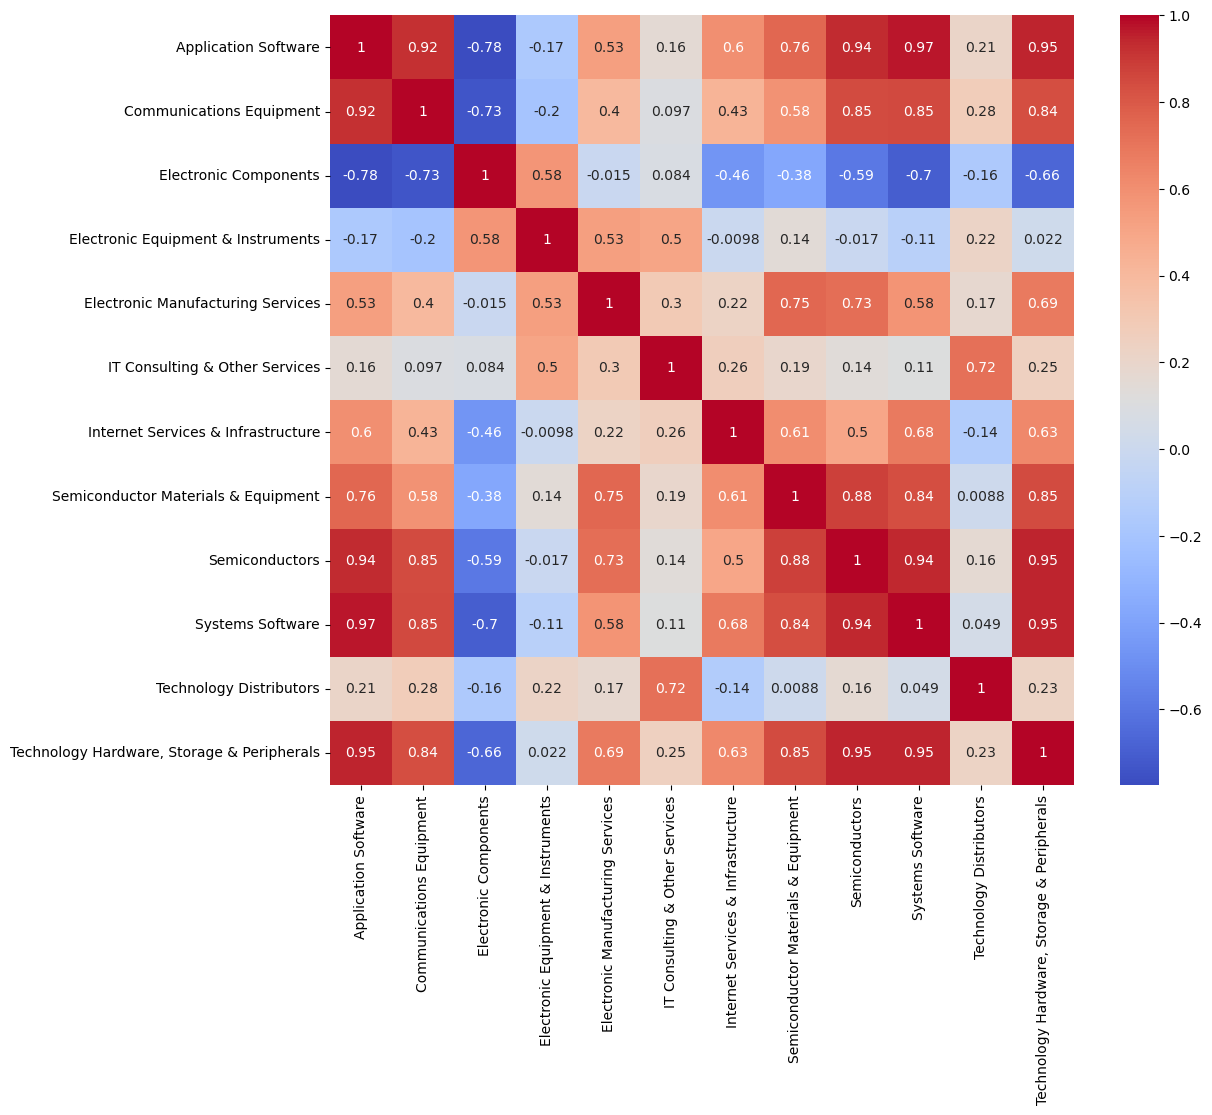

In [37]:
plt.figure(figsize = (12,10))
sns.heatmap(IndustryIT_pivot.corr(),annot=True, cmap="coolwarm")

We've generated a correlation matrix for our Industries, with higher correlations indicating stocks moving in tandem. In simple terms, highly correlated stocks tend to rise or fall together.

For a well-rounded portfolio, investors target negatively correlated stocks, minimizing risk and promoting peace of mind. In a two-stock portfolio with negative correlation, when one falters, the other often excels. Conversely, risk enthusiasts may opt for positively correlated stocks, aiming for greater returns at the expense of heightened risk.

<function matplotlib.pyplot.show(close=None, block=None)>

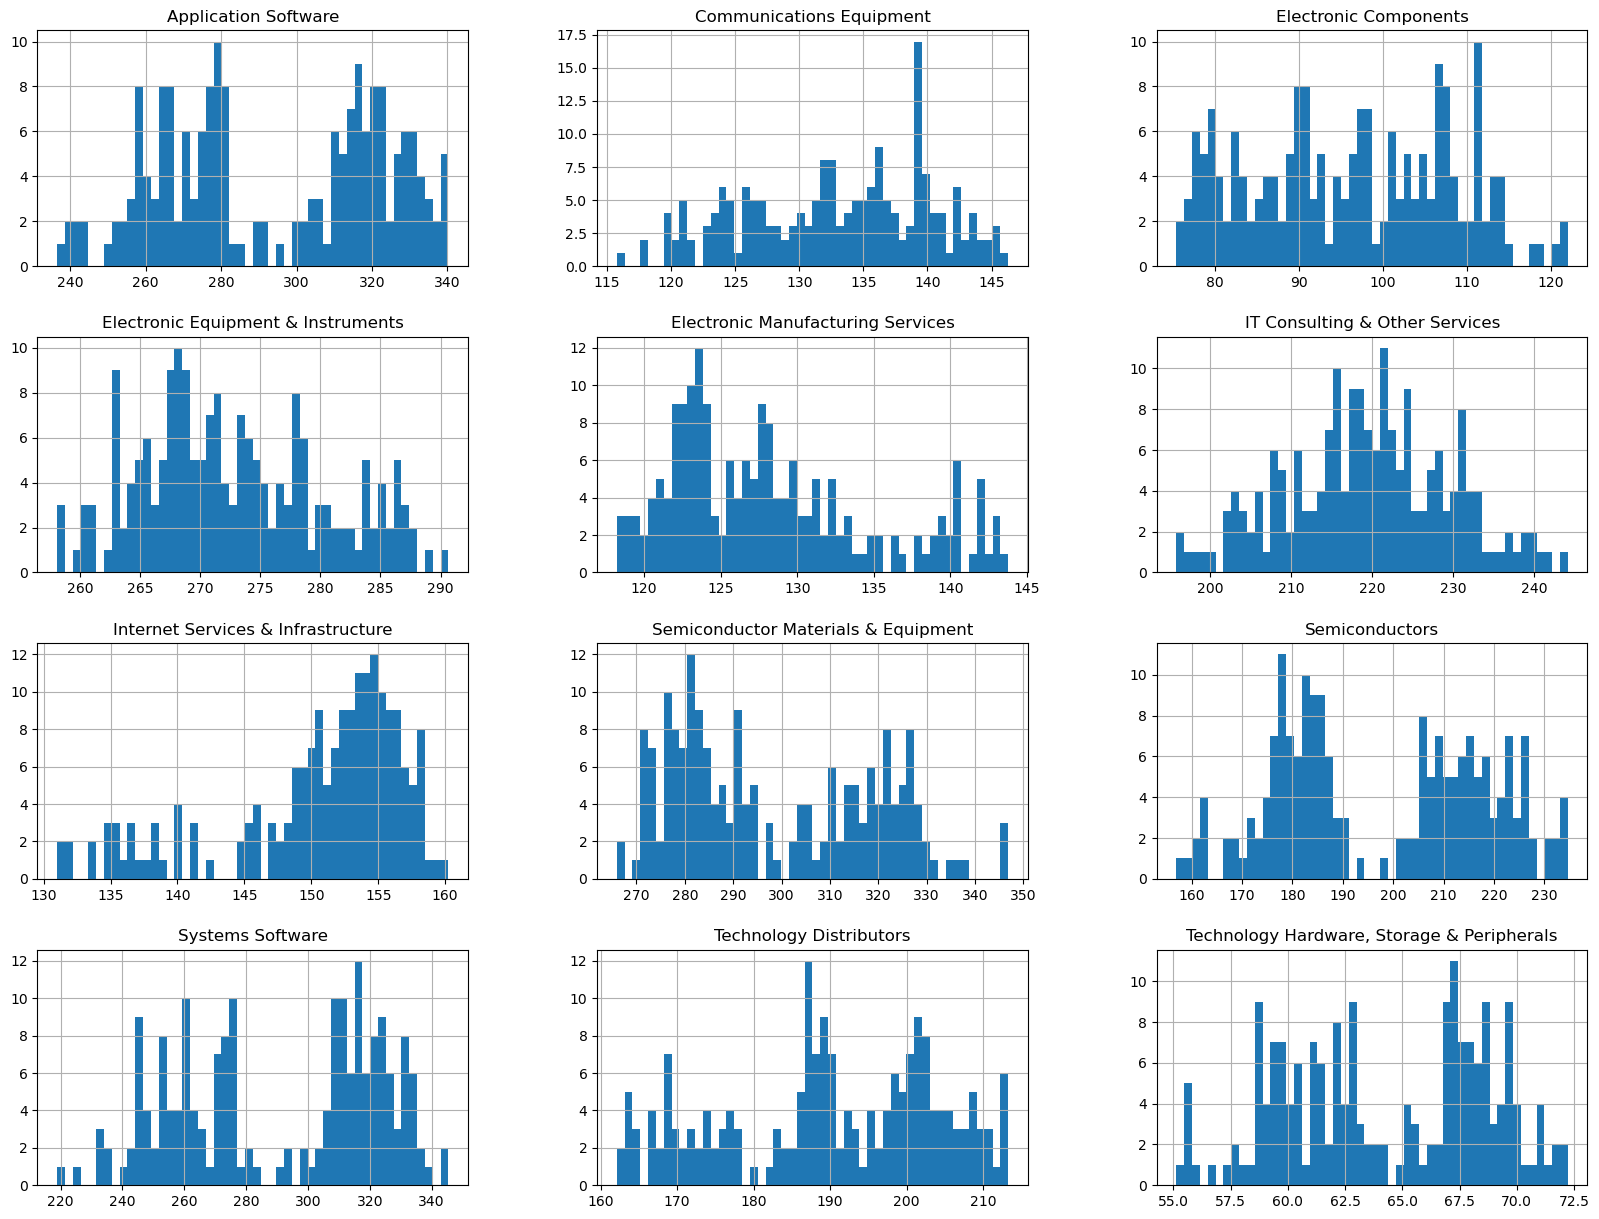

In [38]:
# Chech stastistical Data Distribution

IndustryIT_pivot.hist(bins = 50 ,figsize = (20,15))
plt.show

Histograms provide valuable insights into the distribution of statistical data, enhancing our ability to analyze data distribution patterns. This is particularly advantageous when applied to stock market prediction.

#  

### Selection base on pct_change

Here we can get better understanding between the previous columns values of our dataset and the curent values. This will help us to analysis how a numeric series or colums change over time

In [39]:
# px.line(IndustryIT_pivot * 100 / IndustryIT_pivot.iloc[0])

ret_port = IndustryIT_pivot.pct_change()
px.line(ret_port)

### Calculate Volatility and Shape Ratio of The Asset

In [40]:
np.random.seed(1)
# security Weight
weights = np.random.random((12,1))
# Do normalization
weights /= np.sum(weights)
print(f'The normalized Weights :  {weights}')


# Generate log of Return
log_return = np.log(IndustryIT_pivot / IndustryIT_pivot.shift(1))
log_return

# Expected return (weighted sum of mean returns).
# Mult by 252 as we always do annual calculation and year has 252 business days
exp_return = log_return.mean().dot(weights)*252
print(f'\nExpected return of the portfolio is : {exp_return[0]}')


# Exp Volatility (Risk)
exp_vol = np.sqrt(weights.T.dot(252*log_return.cov().dot(weights)))
print(f'\nVolatility of the portfolio: {exp_vol[0][0]}')


# Sharpe ratio
sr = exp_return / exp_vol
print(f'\nSharpe ratio of the portfolio: {sr[0][0]}')

The normalized Weights :  [[9.81065022e-02]
 [1.69459922e-01]
 [2.69072450e-05]
 [7.11252425e-02]
 [3.45250537e-02]
 [2.17231140e-02]
 [4.38186418e-02]
 [8.12948809e-02]
 [9.33415231e-02]
 [1.26759318e-01]
 [9.86175959e-02]
 [1.61201298e-01]]

Expected return of the portfolio is : 0.2592632277733016

Volatility of the portfolio: 0.18181828731894484

Sharpe ratio of the portfolio: 1.4259469253414712


Diversification Analysis: Normalized weights help assess portfolio diversification. A well-diversified portfolio should have relatively equal weights among its holdings, reducing exposure to individual stock risk.

In summary, normalized weights provide valuable insights into the composition and characteristics of a stock portfolio, aiding investors in making informed decisions regarding diversification, risk management, and performance evaluation.

##

### Selection based Monte Carlo Simulation

In a Monte Carlo Simulation, we randomly allocate weights to securities, evaluate returns and risks, and pinpoint the optimal weight combination for maximum return at a defined risk level. Alternatively, SciPy can solve this optimization problem.

In [41]:
# number of simulation
n = 50_000
# n = 10

port_weights = np.zeros(shape=(n,len(IndustryIT_pivot.columns)))
port_volatility = np.zeros(n)
port_sr = np.zeros(n)
port_return = np.zeros(n)

num_securities = len(IndustryIT_pivot.columns)
# num_securities
for i in range(n):
    # Weight each security
    weights = np.random.random(12)
    # normalize it, so that some is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights
    #     print(f'Normalized Weights : {weights.flatten()}')

    # Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
    exp_ret = log_return.mean().dot(weights)*252
    port_return[i] = exp_ret
#     print(f'\nExpected return is : {exp_ret[0]}')

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(252*log_return.cov().dot(weights)))
    port_volatility[i] = exp_vol
#     print(f'\nVolatility : {exp_vol[0][0]}')

    # Sharpe ratio
    sr = exp_ret / exp_vol
    port_sr[i] = sr
#     print(f'\nSharpe ratio : {sr[0][0]}')

In [42]:
# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

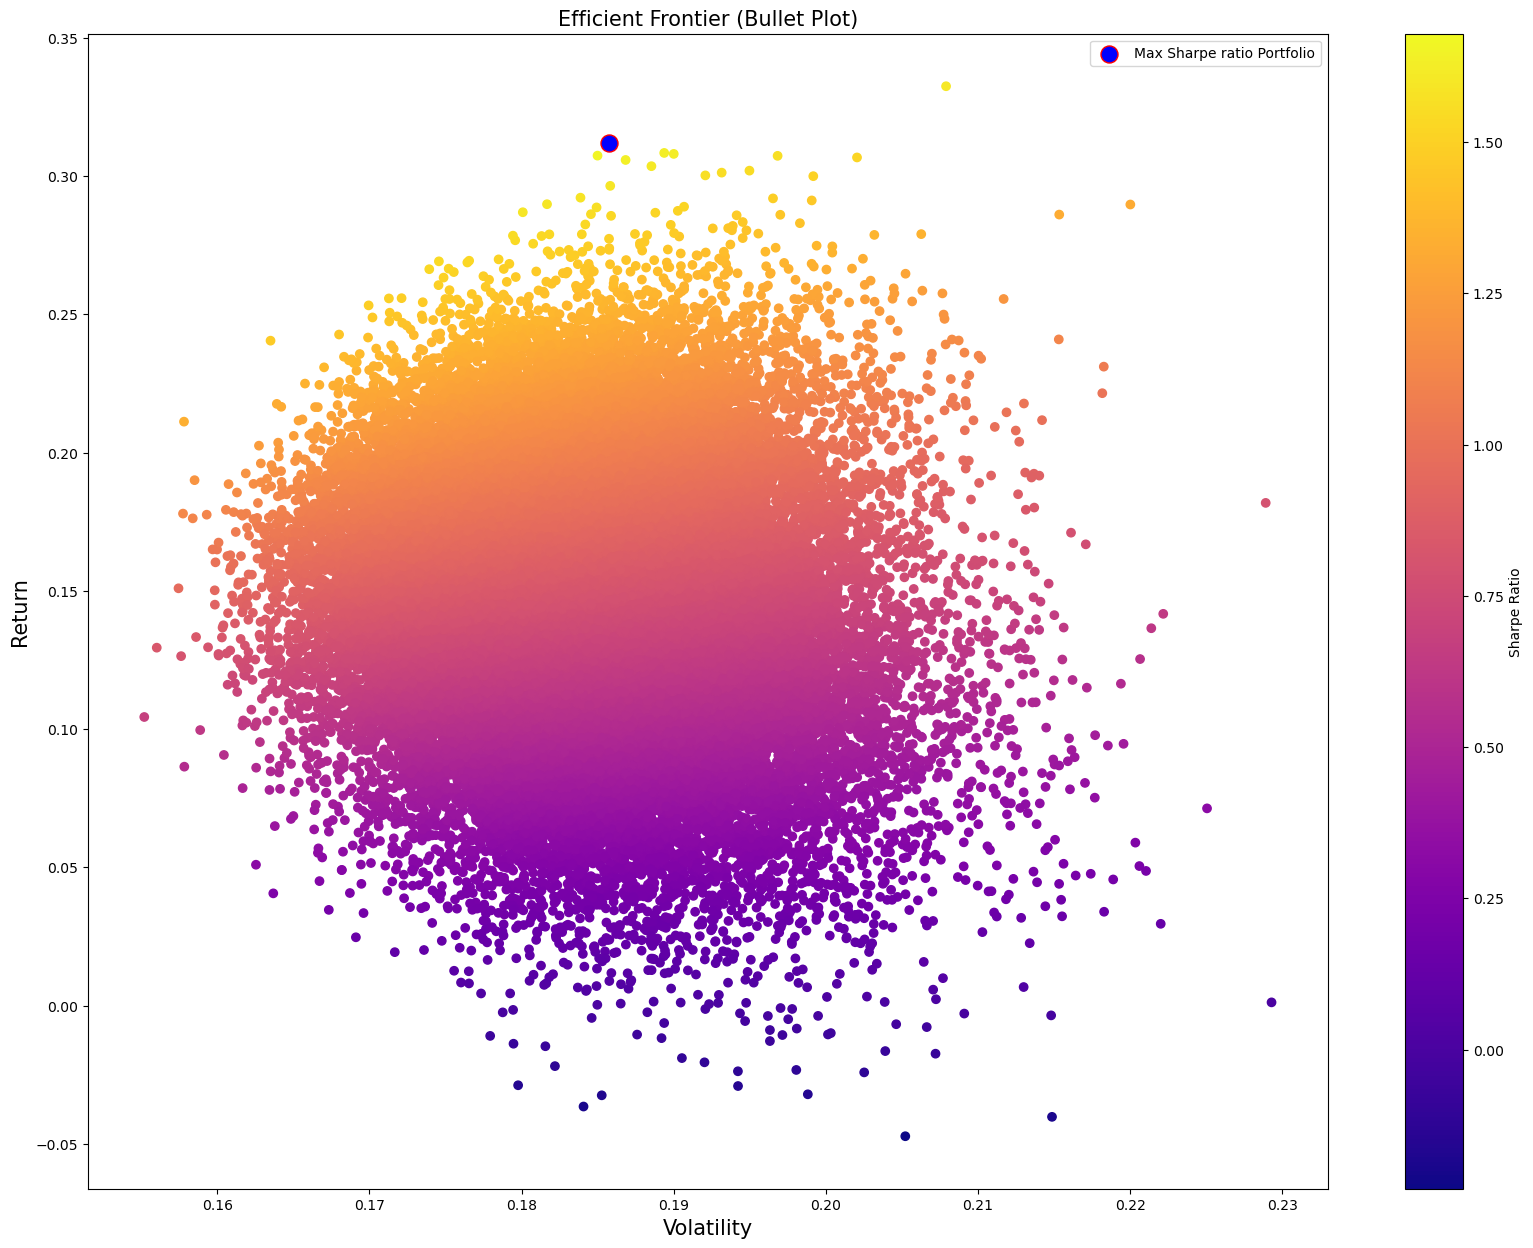

In [43]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.legend();

A volatility scatter plot for stock assets can provide several insights:

1. Risk-Return Relationship: It can help you visualize the relationship between risk (volatility) and return (typically represented by historical or expected returns). Assets located in the upper-right quadrant of the plot tend to offer higher returns but also come with higher volatility, while those in the lower-left quadrant have lower returns but lower volatility.

2. Risk Diversification: By plotting multiple assets, you can assess how different stocks behave in terms of volatility. Diversification strategies often involve selecting assets that have low or negatively correlated volatility to reduce overall portfolio risk.

3. Outliers: The plot can highlight outliers, which are stocks with exceptionally high or low volatility relative to others. These outliers may warrant further investigation, as they can present unique investment opportunities or risks.

4. Sector Analysis: Grouping assets by sector and plotting them can reveal sector-specific patterns in volatility. Some sectors, such as technology or biotech, may naturally exhibit higher volatility compared to more stable sectors like utilities or consumer staples.

5. Historical Trends: Over time, the scatter plot can show how the volatility of specific assets or the overall market has evolved. This can be valuable for assessing changing market conditions.

6. Portfolio Optimization: If you're building a diversified portfolio, the plot can help you select assets that align with your risk tolerance and return objectives. You can aim to balance assets with different risk-return profiles.

It's important to note that while a volatility scatter plot can provide insights, it should be used in conjunction with other financial analysis tools and considerations to make informed investment decisions. Additionally, historical volatility may not always predict future volatility, so risk assessment should be dynamic and adaptable.

In [44]:
for weight, tickers_IDs in zip(port_weights[ind],tickers_ID):
    print(f'{round(weight * 100, 2)} % of {tickers_IDs} should be bought.')

# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

16.91 % of IT Consulting & Other Services should be bought.
15.17 % of Application Software should be bought.
1.29 % of Internet Services & Infrastructure should be bought.
0.03 % of Semiconductors should be bought.
0.65 % of Electronic Components should be bought.
3.55 % of Technology Hardware, Storage & Peripherals should be bought.
4.4 % of Semiconductor Materials & Equipment should be bought.
2.44 % of Communications Equipment should be bought.
11.3 % of Technology Distributors should be bought.
17.6 % of Systems Software should be bought.
9.39 % of Electronic Equipment & Instruments should be bought.
17.26 % of Electronic Manufacturing Services should be bought.

Markowitz optimal portfolio return is : 31.18% with volatility 0.18571665143637442


#### optimization

### SciPy to get the max of Sharpe Ration

In [45]:
log_mean = log_return.mean() * 252
cov = log_return.cov() * 252

In [46]:
# Some helper functions
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

# Negate Sharpe ratio as we need to max it but Scipy minimize the given function
def neg_sr(weights):
    return get_ret_vol_sr(weights)[-1] * -1

# check sum of weights
def check_sum(weights):
    return np.sum(weights) - 1

# Constraints for the optimization problem
cons = {'type':'eq','fun':check_sum}
# bounds on weights
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
# initial guess for optimization to start with
init_guess = [.25 for _ in range(12)]


# Call minimizer
opt_results = optimize.minimize(neg_sr, init_guess, constraints=cons, bounds=bounds, method='SLSQP')

In [47]:
optimal_weights = opt_results.x
# optimal_weights
for tickers_IDs, i in zip(tickers_ID,optimal_weights):
    print(f'Stock {tickers_IDs} has weight {np.round(i*100,2)} %')

Stock IT Consulting & Other Services has weight 100.0 %
Stock Application Software has weight 0.0 %
Stock Internet Services & Infrastructure has weight 0.0 %
Stock Semiconductors has weight 0.0 %
Stock Electronic Components has weight 0.0 %
Stock Technology Hardware, Storage & Peripherals has weight 0.0 %
Stock Semiconductor Materials & Equipment has weight 0.0 %
Stock Communications Equipment has weight 0.0 %
Stock Technology Distributors has weight 0.0 %
Stock Systems Software has weight 0.0 %
Stock Electronic Equipment & Instruments has weight 0.0 %
Stock Electronic Manufacturing Services has weight 0.0 %


In [48]:
mc_weights = port_weights[ind]
for st, i in zip(tickers_ID,mc_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

Stock IT Consulting & Other Services has weight 16.91 %
Stock Application Software has weight 15.17 %
Stock Internet Services & Infrastructure has weight 1.29 %
Stock Semiconductors has weight 0.03 %
Stock Electronic Components has weight 0.65 %
Stock Technology Hardware, Storage & Peripherals has weight 3.55 %
Stock Semiconductor Materials & Equipment has weight 4.4 %
Stock Communications Equipment has weight 2.44 %
Stock Technology Distributors has weight 11.3 %
Stock Systems Software has weight 17.6 %
Stock Electronic Equipment & Instruments has weight 9.39 %
Stock Electronic Manufacturing Services has weight 17.26 %


Diversification: The weight of an asset in a portfolio indicates how much exposure an investor has to that particular asset. A well-diversified portfolio often has assets with different weights to spread risk effectively.

Risk Assessment: A high weight in a single asset can indicate concentration risk. If that asset performs poorly, it can significantly impact the overall performance of the portfolio.

In summary, the weight of an asset in stock analysis is a crucial metric for understanding portfolio composition, risk, and performance. It can help investors make informed decisions about asset allocation and assess the impact of individual holdings on their overall investment strategy.

In [49]:
# Comparing two results we see that we get very close results
(optimal_weights - mc_weights)

array([ 8.30913016e-01, -1.51735422e-01, -1.29378169e-02, -3.30671374e-04,
       -6.52523331e-03, -3.55400499e-02, -4.39585522e-02, -2.44334461e-02,
       -1.12998812e-01, -1.75951040e-01, -9.38911797e-02, -1.72610792e-01])

In [50]:
get_ret_vol_sr(optimal_weights), get_ret_vol_sr(mc_weights)

print('For a given portfolio we have: (Using SciPy optimizer)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(optimal_weights)[i]}\n')

print('For a given portfolio we have: (Using Monte Carlo)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(mc_weights)[i]}\n')

For a given portfolio we have: (Using SciPy optimizer)
 

Return is : 0.46318532003729196

Volatility is : 0.20820310484646268

SharpeRatio is : 2.2246801764981528

For a given portfolio we have: (Using Monte Carlo)
 

Return is : 0.31180975965318286

Volatility is : 0.18571665143637445

SharpeRatio is : 1.6789542415371799



So MC and Optimizer gives very close results. MC is good, but if we have many assets, since MC computationally heavy, SciPy is going to be a saviour!!!

1. *SciPy Optimizer-Generated Weights*:
   - *Purpose*: SciPy optimizers are typically used in mathematical optimization problems to find the best set of parameters that minimize or maximize a specific objective function.
   - *Usage*: These weights are often used to optimize models in various domains, such as machine learning (e.g., neural network weights), engineering (e.g., optimizing control systems), and finance (e.g., portfolio optimization). They represent the optimal solution to a specific problem.

2. *Monte Carlo Simulation-Generated Weights*:
   - *Purpose*: Monte Carlo simulations are used to model uncertainty and variability in a system by repeatedly sampling random inputs and assessing the outcomes. In finance, it's often used for risk analysis, option pricing, and more.
   - *Usage*: Weights generated from Monte Carlo simulations are typically used to estimate probabilistic outcomes and risk measures. For example, in finance, these weights might represent the distribution of potential returns for a portfolio under various market scenarios. They help investors assess the risk associated with their investments.

In summary, SciPy optimizer-generated weights are primarily used to find optimal solutions to deterministic optimization problems, while Monte Carlo simulation-generated weights are used to model and analyze probabilistic outcomes and uncertainties in a system. The choice between these methods depends on the specific problem you're trying to solve and whether you're dealing with deterministic or stochastic (random) elements in your model.

### Frontier curve
Best return for given volatility or vice versa.

In [51]:
frontier_y = np.linspace(port_return.min(), port_return.max(), 100)
frontier_vol = []

def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

for possible_ret in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0] - possible_ret})
    result = optimize.minimize(minimize_vol, init_guess, method='SLSQP', constraints=cons, bounds=bounds)
    frontier_vol.append(result['fun'])

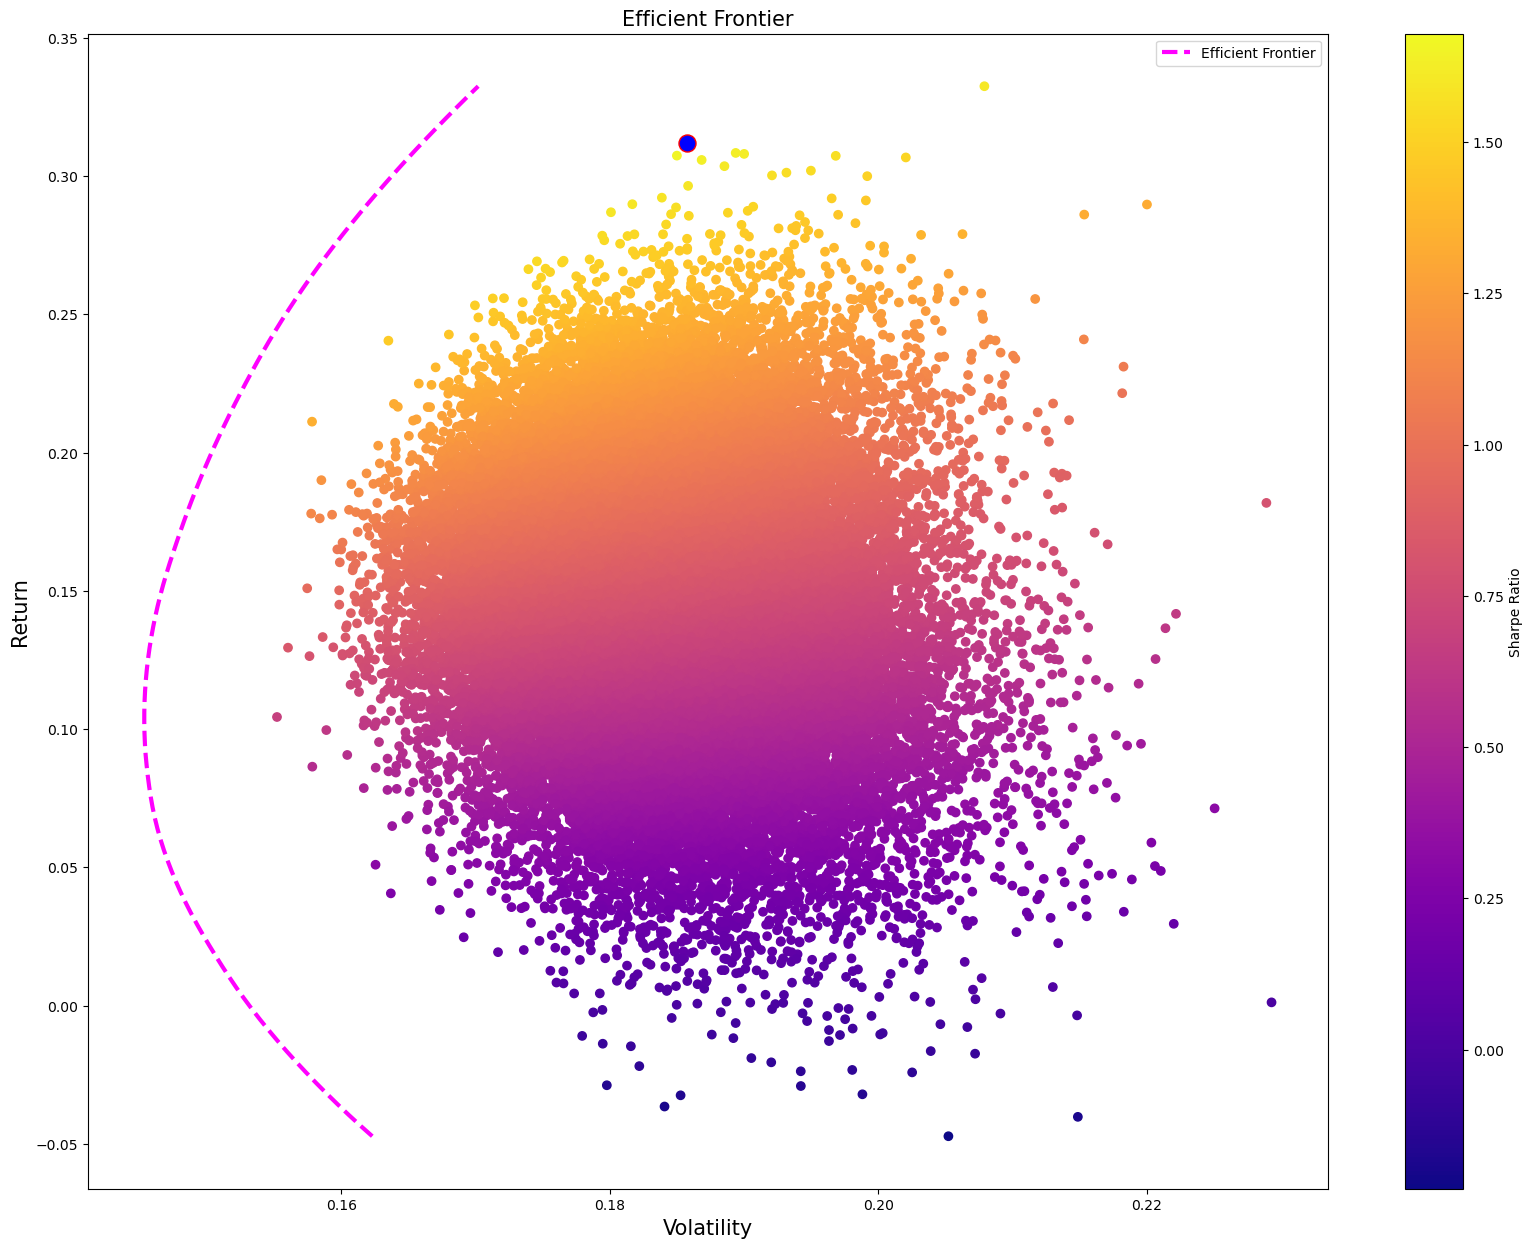

In [52]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o')

plt.plot(frontier_vol, frontier_y, c='magenta', ls='--', lw=3, label='Efficient Frontier')
plt.legend();

#### Frontier curve
Selecting the portfolio with the highest Sharpe ratio is a widely accepted approach, though personal preferences can also play a role in decision-making. The efficient frontier offers the maximum profit achievable for a given level of risk. Therefore, any portfolio situated below this efficient frontier is generally considered suboptimal, assuming we are aiming for returns above the risk-free rate.


##
#### Portfolio selection by Sector Companies

In [53]:
sp500_table_tech_priceITranspos['return'] = np.log(sp500_table_tech_priceITranspos.Close / sp500_table_tech_priceITranspos.Close.shift(1)) + 1
sp500_table_tech_priceITranspos['good'] = sp500_table_tech_priceITranspos['Symbol'] == sp500_table_tech_priceITranspos['Symbol'].shift(1)
sp500_table_tech_priceITranspos = sp500_table_tech_priceITranspos.drop(sp500_table_tech_priceITranspos[sp500_table_tech_priceITranspos['good'] == False].index)
sp500_table_tech_priceITranspos.dropna(inplace = True)

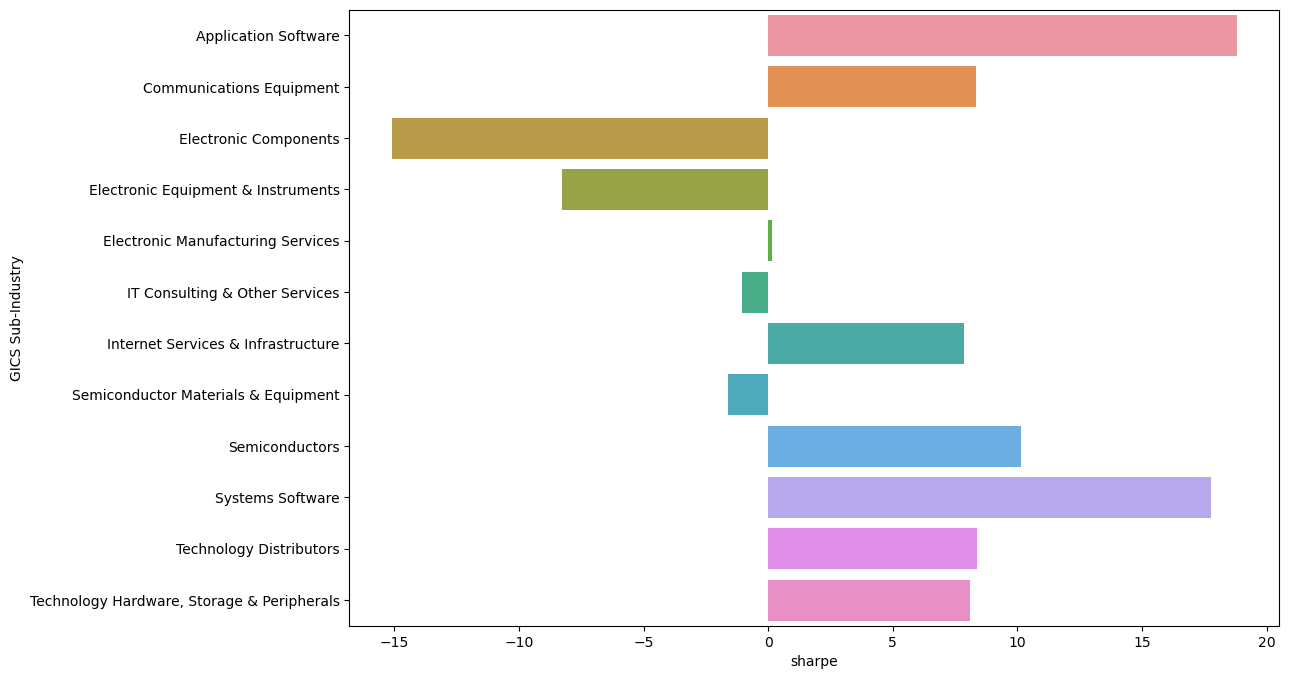

In [54]:
risk_free = 0.034
Industry_df = pd.DataFrame({'return' : (sp500_table_tech_priceITranspos.groupby('GICS Sub-Industry')['return'].mean() - 1) * 252, 'stdev' : sp500_table_tech_priceITranspos.groupby('GICS Sub-Industry')['return'].std()})
Industry_df['sharpe'] = (Industry_df['return'] - risk_free) / Industry_df['stdev']
plt.figure(figsize = (12,8))
ax = sns.barplot(x= Industry_df['sharpe'], y = Industry_df.index)

#### The Sharpe ratio

The Sharpe ratio is a common metric for evaluating portfolio performance, with higher values indicating stronger portfolios. Investors generally find a Sharpe ratio exceeding 1 acceptable. In practice, we focus on companies with Sharpe ratios above 1 when making investment choices.

#

In [55]:
port_list = Industry_df[Industry_df['sharpe'] >= 1].index
port_list

Index(['Application Software', 'Communications Equipment',
       'Internet Services & Infrastructure', 'Semiconductors',
       'Systems Software', 'Technology Distributors',
       'Technology Hardware, Storage & Peripherals'],
      dtype='object', name='GICS Sub-Industry')

In [56]:
sp500_table_tech_priceITranspos

Date Symbol       Close  \
1     2023-01-11   AAPL  132.922897   
2     2023-01-12   AAPL  132.843231   
3     2023-01-13   AAPL  134.187485   
4     2023-01-17   AAPL  135.362488   
5     2023-01-18   AAPL  134.635590   
...          ...    ...         ...   
12091 2023-10-04   ZBRA  230.940002   
12092 2023-10-05   ZBRA  222.539993   
12093 2023-10-06   ZBRA  223.850006   
12094 2023-10-09   ZBRA  222.580002   
12095 2023-10-10   ZBRA  222.399994   

                                GICS Sub-Industry    return  good  
1      Technology Hardware, Storage & Peripherals  1.020892  True  
2      Technology Hardware, Storage & Peripherals  0.999400  True  
3      Technology Hardware, Storage & Peripherals  1.010068  True  
4      Technology Hardware, Storage & Peripherals  1.008718  True  
5      Technology Hardware, Storage & Peripherals  0.994616  True  
...                                           ...       ...   ...  
12091          Electronic Equipment & Instruments  1.002645  True  
12092          Electronic Equipment & Instruments  0.962949  True  
12093          Electronic Equipment & Instruments  1.005869  True  
12094          Electronic Equipment & Instruments  0.994310  True  
12095          Electronic Equipment & Instruments  0.999191  True  

[12032 rows x 6 columns]

Once we've compiled the list of sectors, we'll select the top-performing stock from each sector. In practice, you would typically choose multiple stocks, but for the sake of simplicity in this example, I'll pick just one for illustration.

In [57]:
port_stock = []
return_stock = []
def get_stock(industry):
    list_stocks = sp500_table_tech_priceITranspos[sp500_table_tech_priceITranspos['GICS Sub-Industry'] == industry]['Symbol'].unique()
    performance = sp500_table_tech_priceITranspos.groupby('Symbol')['return'].apply(lambda x : (gmean(x) - 1) * 252).sort_values(ascending = False)

    for i in range(len(performance)):
        if performance.index[i] in list_stocks:
            port_stock.append(performance.index[i])
            return_stock.append(performance[i])
            break

for industry in port_list:
    get_stock(industry)

return_stock

[0.7959783290909517,
 0.5991797449609946,
 0.2514017216233482,
 1.2996455536553846,
 0.4619761113889398,
 0.13706748579469075,
 0.4007645966234854]

In [58]:
port_df = sp500_table_tech_priceITranspos[sp500_table_tech_priceITranspos['Symbol'].isin(port_stock)].pivot('Date','Symbol','return')
port_df

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

### Porfolio risk and return calculation



In [ ]:
return_pred = []
weight_pred = []
std_pred = []
for i in range(1000):
    random_matrix = np.array(np.random.dirichlet(np.ones(len(port_stock)),size=1)[0])
    port_std = np.sqrt(np.dot(random_matrix.T, np.dot(port_df.cov(),random_matrix))) * np.sqrt(252)
    port_return = np.dot(return_stock, random_matrix)
    return_pred.append(port_return)
    std_pred.append(port_std)
    weight_pred.append(random_matrix)

In [ ]:
pred_output = pd.DataFrame({'weight' : weight_pred , 'return' : return_pred, 'stdev' :std_pred })
pred_output['sharpe'] = (pred_output['return'] - risk_free) / pred_output['stdev']
pred_output.head()

In [ ]:
max_pos = pred_output.iloc[pred_output.sharpe.idxmax(),:]
safe_pos = pred_output.iloc[pred_output.stdev.idxmin(),:]

After running 2000 simulations, we finally plot the results, as well as the options for the portfolio, either the best performing or the safest one for risk adverse.

In [ ]:
plt.subplots(figsize=(15,10))

plt.scatter(pred_output.stdev,pred_output['return'],c=pred_output.sharpe,cmap='OrRd')
plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_pos.stdev,max_pos['return'],marker='^',color='r',s=500)
plt.scatter(safe_pos.stdev,safe_pos['return'],marker='<',color='g',s=500)
#ax.plot()

In [ ]:
print("The highest sharpe porfolio is {} sharpe, at {} volitality".format(max_pos.sharpe.round(3),max_pos.stdev.round(3)))

for i in range(len(port_stock)):
    print("{} : {}%".format(port_stock[i],(max_pos.weight[i] * 100).round(3)))

In [ ]:
print("The safest porfolio is {} risk, {} sharpe".format(safe_pos.stdev.round(3), safe_pos.sharpe.round(3)))
for i in range(len(port_stock)):
    print("{} : {}%".format(port_stock[i],(safe_pos.weight[i] * 100).round(3)))

## Conclusion

In conclusion, when applying the Markowitz Portfolio Theory to the technology sector in the S&P 500, our portfolio selection was based on several key insights. First, we considered the correlation among industries, aiming to include negatively correlated stocks to minimize risk. This approach promotes a well-rounded portfolio that provides peace of mind to investors. Alternatively, those seeking higher returns at the cost of increased risk may opt for positively correlated stocks.

Additionally, we used percentage changes to better understand how the values in our dataset evolved over time, aiding in our analysis of stock performance. This allowed us to track the dynamics of the stocks in our portfolio.

Furthermore, we employed Monte Carlo Simulation and SciPy optimization to randomly allocate weights to securities and determine the optimal combination for maximizing returns at a defined risk level. This approach helps investors make data-driven decisions regarding their portfolio composition.

When constructing our portfolio, we considered the efficient frontier and aimed to select the portfolio with the highest Sharpe ratio. The efficient frontier represents the maximum profit achievable for a given level of risk, and portfolios positioned below it are generally considered suboptimal. By focusing on the Sharpe ratio, we aimed for portfolios with higher values, typically exceeding 1, to ensure stronger portfolio performance in practice.

In summary, our approach to portfolio selection based on correlation, percentage changes, Monte Carlo Simulation, and the Sharpe ratio provides a comprehensive framework for constructing a technology S&P 500 portfolio that balances risk and return to meet investors' financial goals and risk tolerance.